## Portfolio Part 3 - Analysis of Mobile Price Data

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


import seaborn as sns
import seaborn as sb 
import matplotlib.pylab as plt
%matplotlib inline

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Mobile_Price_Data.csv")

## Q1. Loading data

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


In [4]:
df.isnull().sum(axis = 0)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Analysis Output
The length of the dataset is 2000. 

There is 1 null value in "int_memory", "m_dep", "px_width", "ram", and "three_g".

The rest of the columns have zero null values.

## Cleaning data

In [5]:
df1= df.dropna()
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


In [6]:
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

The length of the data after removing the data is 1995.

## Exploring data

In [7]:
df1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1995 non-null   int64  
 1   blue           1995 non-null   int64  
 2   clock_speed    1995 non-null   float64
 3   dual_sim       1995 non-null   int64  
 4   fc             1995 non-null   int64  
 5   four_g         1995 non-null   int64  
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1995 non-null   int64  
 9   n_cores        1995 non-null   int64  
 10  pc             1995 non-null   int64  
 11  px_height      1995 non-null   int64  
 12  px_width       1995 non-null   float64
 13  ram            1995 non-null   float64
 14  sc_h           1995 non-null   int64  
 15  sc_w           1995 non-null   int64  
 16  talk_time      1995 non-null   int64  
 17  three_g        1995 non-null   float64
 18  touch_screen 

In [9]:
df1.shape

(1995, 21)

In [10]:
df1['price_range'].value_counts()

price_range
2    499
3    499
0    499
1    498
Name: count, dtype: int64

## Q2. Correlation between 'price range' and other features

In [11]:
corr_matrix = df1.corr()
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
               battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.013109     0.012529 -0.041212  0.033517   
blue                0.013109  1.000000     0.020623  0.035745  0.005228   
clock_speed         0.012529  0.020623     1.000000 -0.000845 -0.000782   
dual_sim           -0.041212  0.035745    -0.000845  1.000000 -0.027615   
fc                  0.033517  0.005228    -0.000782 -0.027615  1.000000   
four_g              0.014471  0.013919    -0.044095  0.004754 -0.017437   
int_memory         -0.002742  0.040635     0.005452 -0.015394 -0.031110   
m_dep               0.034308  0.004562    -0.013468 -0.023029 -0.002332   
mobile_wt           0.000132 -0.009235     0.012530 -0.008174  0.024703   
n_cores            -0.028439  0.035895    -0.005009 -0.025251 -0.013460   
pc                  0.032506 -0.009792    -0.006509 -0.016044  0.644175   
px_height           0.015287 -0.005508    -0.014376 -0.021557 -0.011687   
px_wi

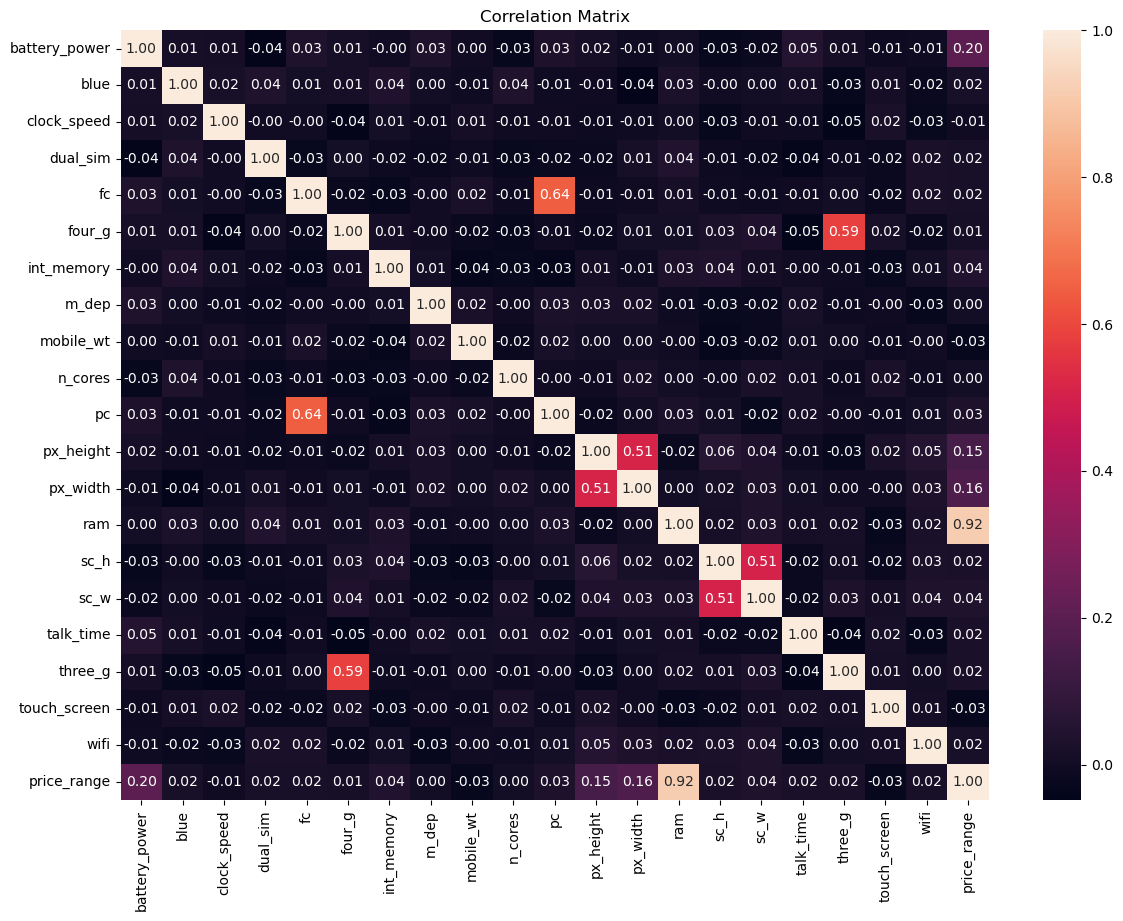

In [12]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True,fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
price_range_correlation = corr_matrix['price_range'].sort_values(ascending=False)
print(price_range_correlation)

price_range      1.000000
ram              0.917131
battery_power    0.202652
px_width         0.164763
px_height        0.147946
int_memory       0.043861
sc_w             0.037330
pc               0.031831
three_g          0.023771
sc_h             0.023067
talk_time        0.022085
blue             0.020846
wifi             0.020394
fc               0.019327
dual_sim         0.018153
four_g           0.014572
n_cores          0.003573
m_dep            0.000776
clock_speed     -0.006926
mobile_wt       -0.028663
touch_screen    -0.031155
Name: price_range, dtype: float64


#### Analysis Output

There is strong positive correlation of 0.917 between 'price range' and 'ram', which indicates that as ram capacity increases, the price range tends to increase accordingly. This correlation suggests that ram plays a crucial role in determining the pricing of mobile devices. 

Variables that would be helpful for predicting price range is 'ram', 'battery_power' (0.202), 'px_width' (0.165), and 'px_height' (0.148).

There is a weak postive correlation with internal memory (0.044), screen width (0.037) and Primary Camera (0.032), suggesting that they have minimal influence on pricing decisions. 

Other features like 3G, screen height, talk time, Bluetooth, WiFi, and dual SIM have very weak correlations with price range. 

Some features like clock speed (-0.007), mobile weight (-0.029), and touch screen (-0.0031), show negative correlations with the price range, indicating a slight inverse relationship. However, these correlations are very weak and may not be practically significant. 

## Q3. Splitting dataset

In [14]:
feature_cols = ['ram', 'battery_power', 'px_width', 'px_height']
X = df1[feature_cols]
y = df1.price_range 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)
print("Training set shape (80%):", X_train.shape)
print("Test set shape (20%):", X_test.shape)

Training set shape (80%): (1596, 4)
Test set shape (20%): (399, 4)


## Q4. Training a logistic regression model

In [16]:
logreg = LogisticRegression(max_iter=1000, random_state=142)
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

## Calculating the accuracy of the model

In [17]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.9586466165413534
Accuracy on test set: 0.974937343358396


In [18]:
# Confusion matrix and classification report
print("\nConfusion Matrix - Training Set")
print(confusion_matrix(y_train, y_train_pred))
print("\nConfusion Matrix - Test Set")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report - Training Set")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report - Test Set")
print(classification_report(y_test, y_test_pred))


Confusion Matrix - Training Set
[[396  11   0   0]
 [  7 373   9   0]
 [  0  10 371  16]
 [  0   0  13 390]]

Confusion Matrix - Test Set
[[ 91   1   0   0]
 [  0 107   2   0]
 [  0   5  97   0]
 [  0   0   2  94]]

Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       407
           1       0.95      0.96      0.95       389
           2       0.94      0.93      0.94       397
           3       0.96      0.97      0.96       403

    accuracy                           0.96      1596
   macro avg       0.96      0.96      0.96      1596
weighted avg       0.96      0.96      0.96      1596


Classification Report - Test Set
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.95      0.98      0.96       109
           2       0.96      0.95      0.96       102
           3       1.00      0.98      0.99        96

    a

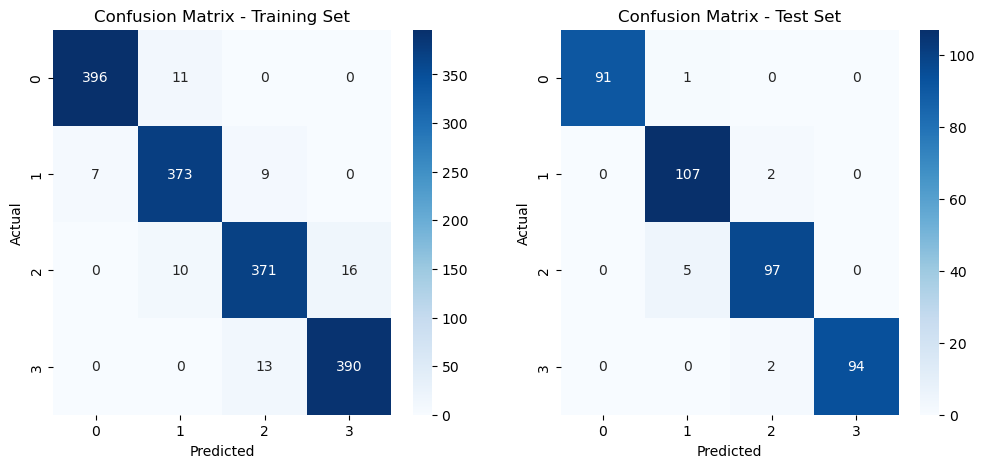

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Training set confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

<Figure size 800x600 with 0 Axes>

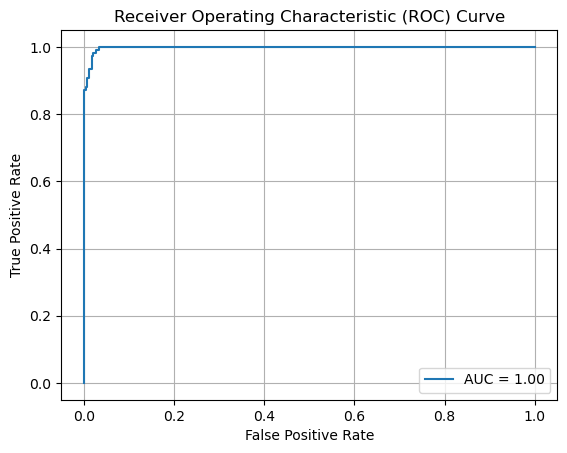

In [20]:
# ROC Curve for test set
y_test_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=1)  # Adjust pos_label if needed
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

## Explanation of the model and evaluation of its performance

The logistic regression model is to predict the 'price range' of mobile phones based on the selected features which are Ram, battery power, pixel width and pixel height. During training, the model learns the relationship between the selected features and the target variable. This is done by optimizing the coefficients of the logistic function.

The performance of this model shows that there is a high accuracy score on both the training and test sets. This suggests that the logistic regression model is able to effectively highlight the relationship between the selected features and the target variable. 

There are several factors that might be contributing to the good performance of this model. Firstly, the selected features exhibit strong correlations with the variable 'price range' and provides valuable information for predicting it accurately. Secondly, the relationship between the features and the target variable appears to be approximately linear, which is well-suited for logistic regression. Furthermore, there seems to be a sufficient number of samples in the dataset. This can help the model learn the underlying patterns and generalise well to new instances. 

In conclusion, the logistic regression model is performing well for predicting the price range of mobile phones based on the selected features. Its high accuracy, interpretability, and efficiency make it a suitable choice for this task. 

## Q5. Training a KNN model

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Calculating the accuracy of the model

In [23]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.956140350877193
Accuracy on test set: 0.8972431077694235


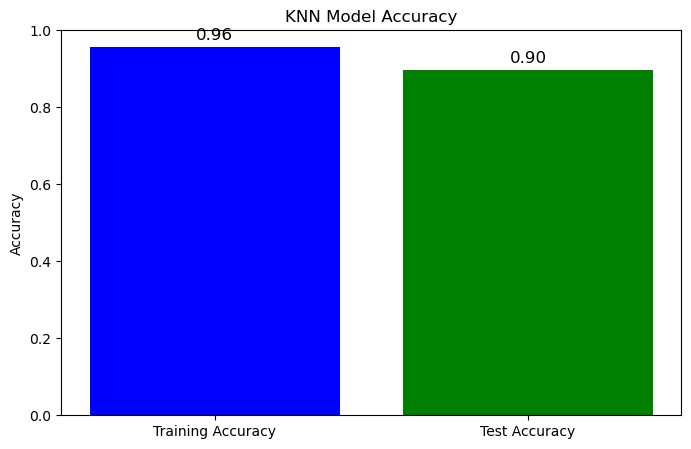

In [24]:
# Bar plot to visualize the accuracies
labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy')
plt.text(0, train_accuracy + 0.01, f'{train_accuracy:.2f}', ha='center', va='bottom', fontsize=12)
plt.text(1, test_accuracy + 0.01, f'{test_accuracy:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

## Explanation of the model and evaluation of its performance

The KNN model predicts the 'price range' of mobile phones based on selected features. The model's performance depends on the value of K, which determines the numbers of neighbors considered for classification. 

The accuracy of the KNN model on the training data is approximately 95.61% and 89.72% on the test data. Both data sets have achieved a high accuracy which suggests that the model is performing reasonably well. The similar accuracy score on both training and test datasets also suggests that the model generealises reasonably well to unseen data. However the significant difference between the training accuracy and the test accuracy indicates that the model might be slightly overfitting the training data.

In conclusion, the KNN model performs well overall, however further fine-tuning could improve performance and reduce the gap between the training and test accuracy. 

## Q6. Tuning the hyper parameter K

In [25]:
k_values = np.arange(1, 21)
param_grid = {'n_neighbors': k_values}
knn = KNeighborsClassifier()

In [26]:
# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameter and best score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best K: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Best K: 7
Best Cross-Validation Accuracy: 0.9317


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['n_neighbors']

## Visualising the result

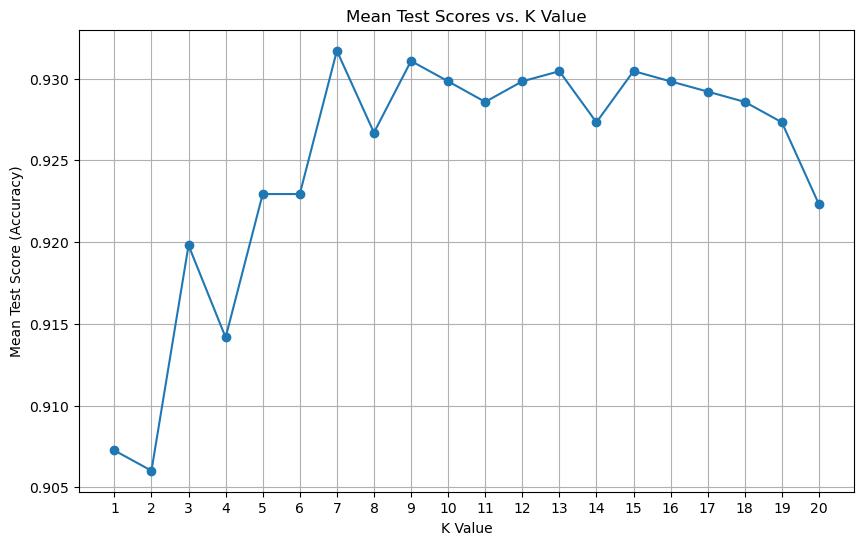

In [28]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score (Accuracy)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## Best parameters

In [29]:
# Best K value
best_k = grid_search.best_params_['n_neighbors']
print("Best K value:", best_k)

# Best model
best_model = grid_search.best_estimator_

# Predictions on the test set using the best model
test_predictions_best = best_model.predict(X_test)

# Calculate accuracy on the test set using the best model
test_accuracy_best = accuracy_score(y_test, test_predictions_best)
print("Accuracy on test set with best K:", test_accuracy_best)

Best K value: 7
Accuracy on test set with best K: 0.9147869674185464


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, test_predictions_best)
print("Confusion Matrix - Test Set with Best K")
print(conf_matrix_best)

# Classification Report
class_report_best = classification_report(y_test, test_predictions_best)
print("\nClassification Report - Test Set with Best K")
print(class_report_best)

Confusion Matrix - Test Set with Best K
[[ 89   3   0   0]
 [  2 101   6   0]
 [  0   7  89   6]
 [  0   0  10  86]]

Classification Report - Test Set with Best K
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        92
           1       0.91      0.93      0.92       109
           2       0.85      0.87      0.86       102
           3       0.93      0.90      0.91        96

    accuracy                           0.91       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.91      0.92       399



## Evaluation

After tuning the hyper-parameter K, the best K value was found to be 7.

The training accuracy (95.61%) is slightly high than the test accuracy (91.48%), which is expected. The small difference indicates that the model generalises well and is not overfitting. The relatively high test accuracy shows that the model performs well on unseen data. 

The confusion matrix and classification report show that the model has high precision, recall and F1-scores for all classes. This suggests that the model is correctly predicting the majority of instances in each class, with very few misclassifications. 

## Explanation of how K influences the prediction on performance

The value of K has a significant impact on the prediction performance. Some ways how K influences the prediction performances are:

1. Overfitting and Underfitting
When K is small, the model relies on the nearest neighbour for prediction, which can lead to high variance and overfitting. This is when the model fails to generalise to unseen data.
When K is large, the model averages predictions over a larger number of neighbors, which can lead to high bias and underfitting. This is when the model simplifies the relationship between features and target variabl, resulting in poor performance on both training and testing datasets. 

2. Bias
When K is small, it has low bias but a high variance, whereas a larger K leads to high bias but low variance. 

3. Optimal K Value
Optimal K value might vary depending on data. It is important to select the K value that maximises performance through cross-validation techniques.

The optimal K value balances the trade-off between bias and variance, leading to the best generalization performance on unseen data.
It's essential to select the K value that maximizes performance on a separate validation set or through cross-validation techniques like GridSearchCV.

In summary, the choice of K in KNN plays a crucial role in determining the model's bias, variance, and generalization ability. Understanding how K influences the prediction performance is essential for effectively applying the KNN algorithm to classification tasks.